In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import vgg19

from utils import get_features, transformation_max, transformation_mean, get_weights, show

In [2]:
def show(images):
    fig, axes = plt.subplots(1, 4)
    for idx, img in enumerate(images):
        axes[idx].imshow(img, cmap="gray")

    fig.set_figwidth(110)
    fig.set_figheight(110)

    plt.show()

# Data Preprocessing

In [3]:
images_name = os.listdir('data/patches')
images = [Image.open(f"data/patches/{name}") for name in images_name]

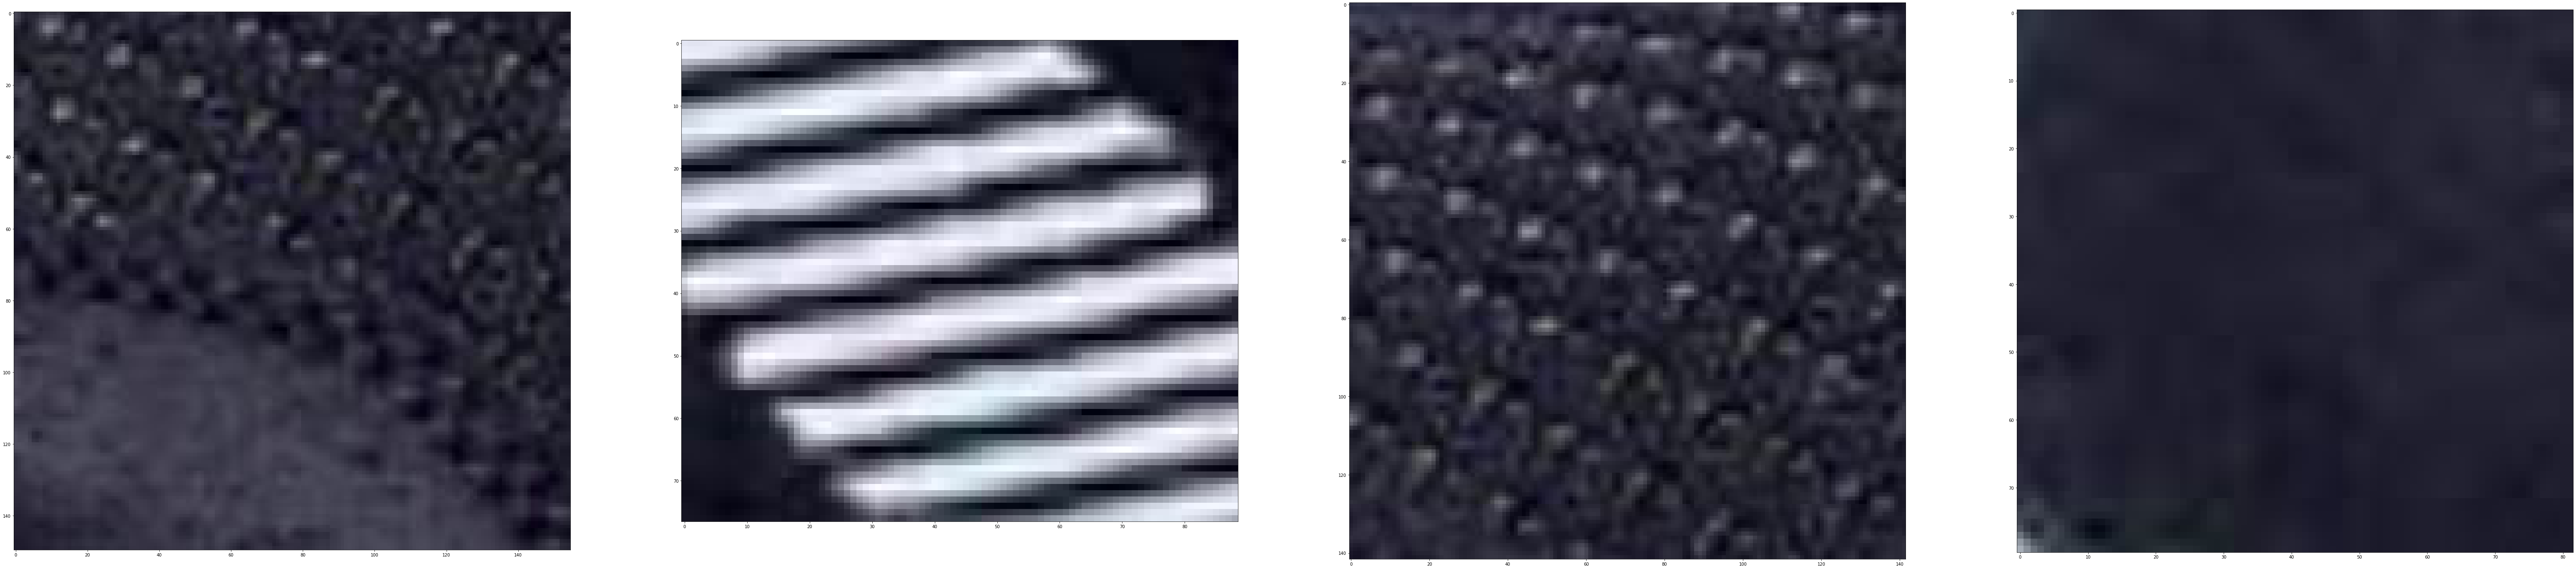

In [4]:
show(images)

In [5]:
SIZE = 100
transform = transforms.Compose([
    transforms.Resize((SIZE, SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.485, 0.456, 0.406), 
        (0.229, 0.224, 0.225)
    )
])

images_tensor = [transform(img).unsqueeze(0) for img in images]

# Model

In [6]:
vgg = vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)
    
    
vgg;

![alt text](data/imgs/vgg19.png "Title")

In [7]:
layers = {
    '0':  'conv1_1',
    '5':  'conv2_1', 
    '10': 'conv3_1', 
    '19': 'conv4_1',
    '28': 'conv5_1'
}

textures = [get_features(img, vgg, layers) for img in images_tensor]

# Get each conv layer

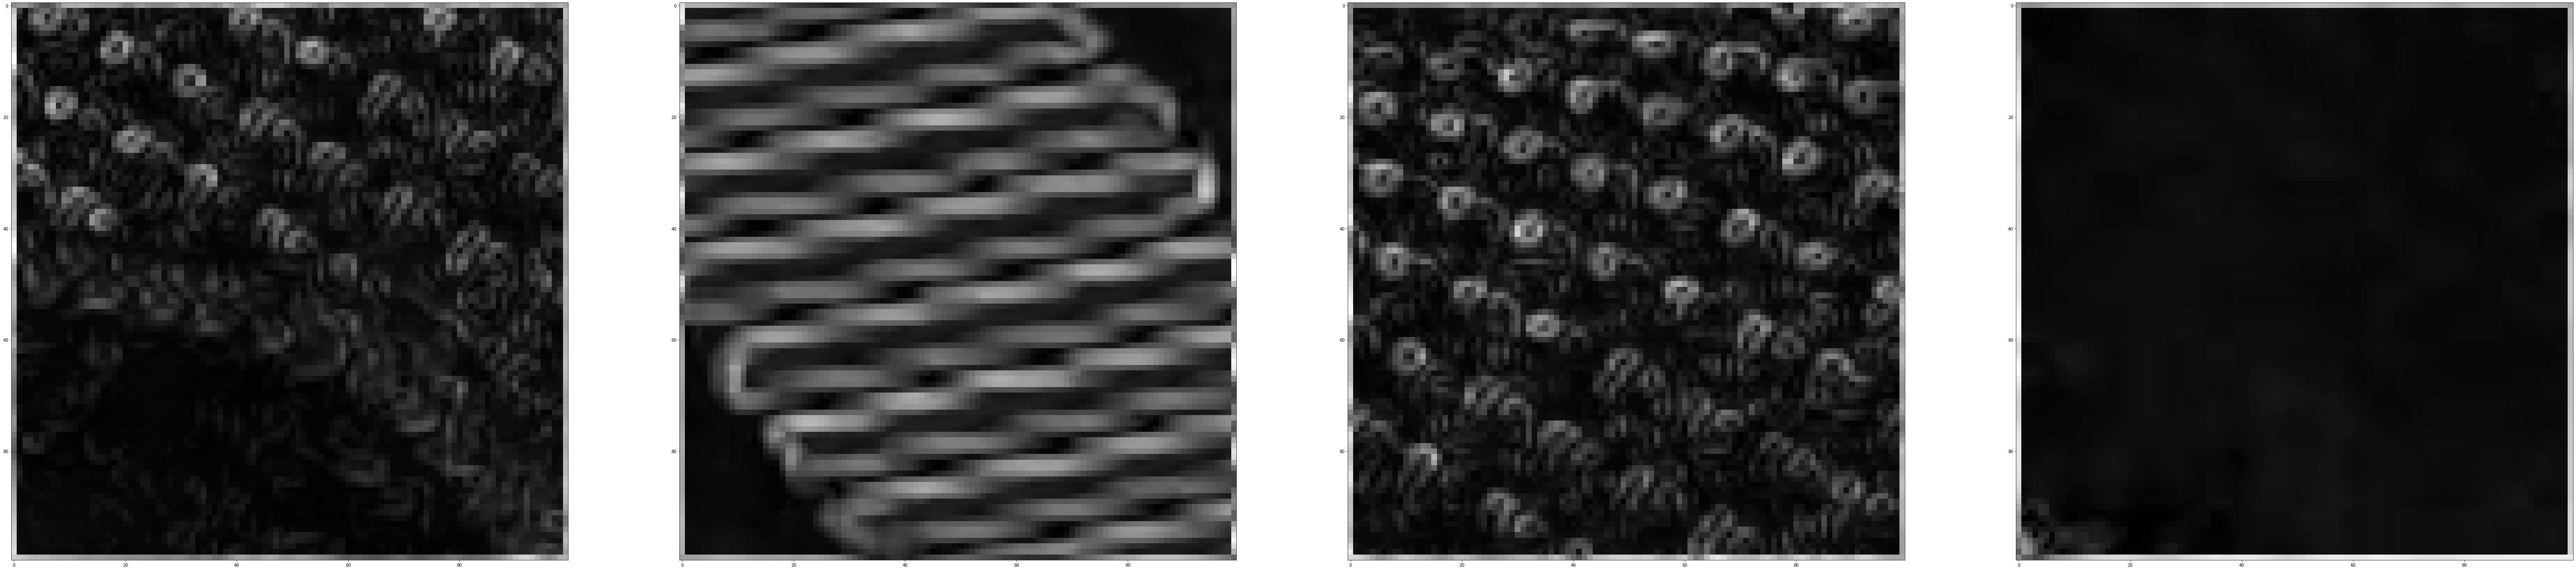

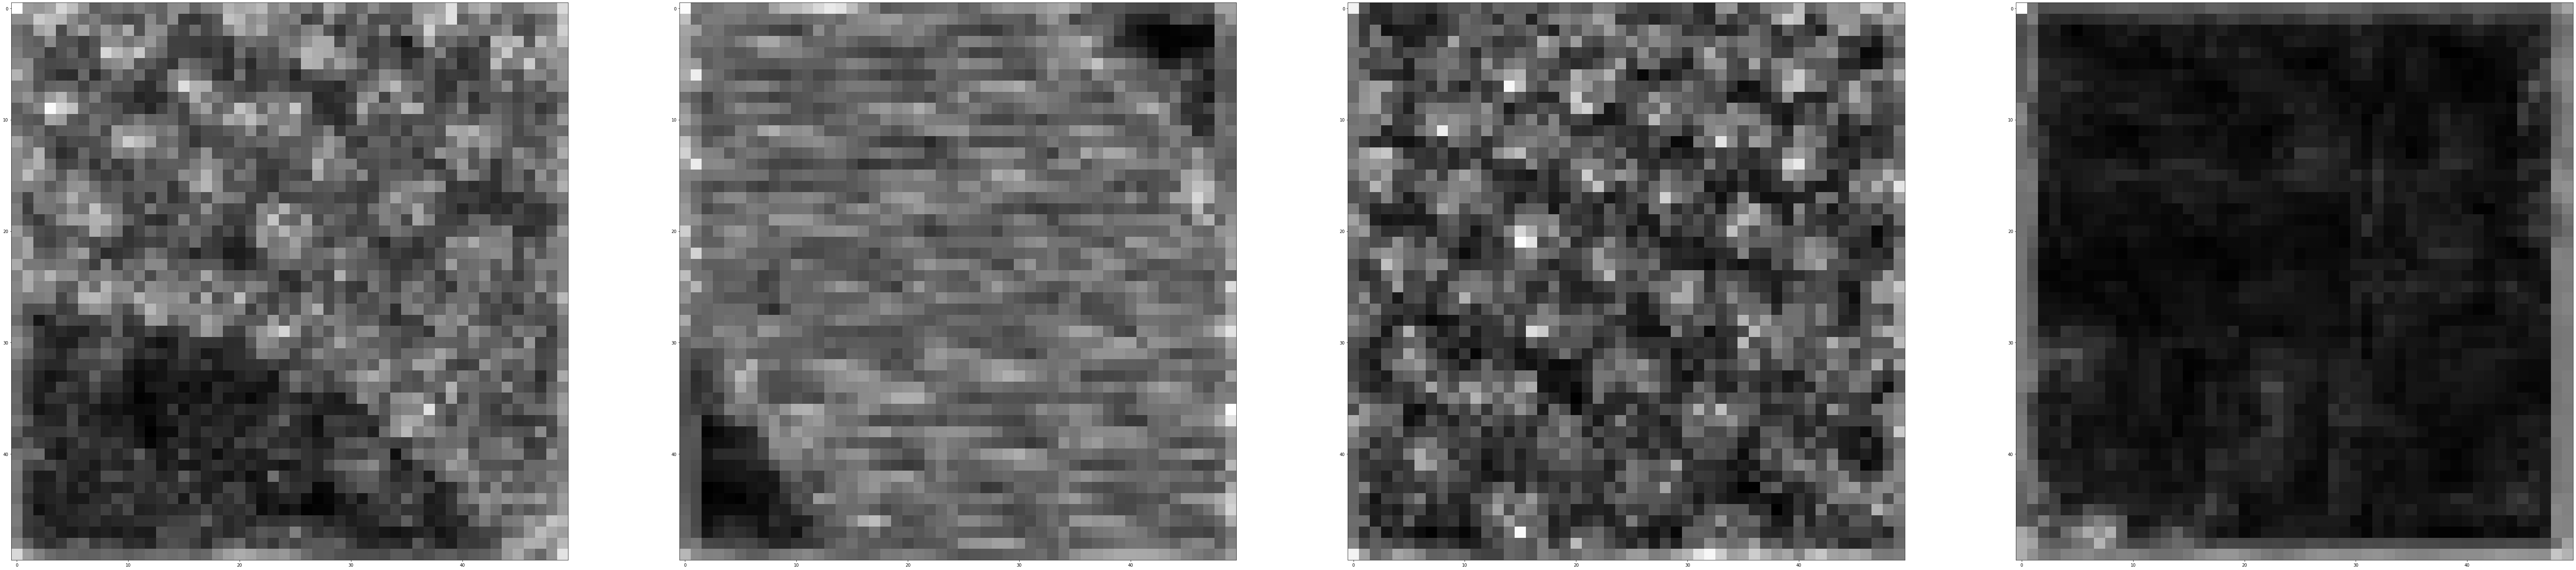

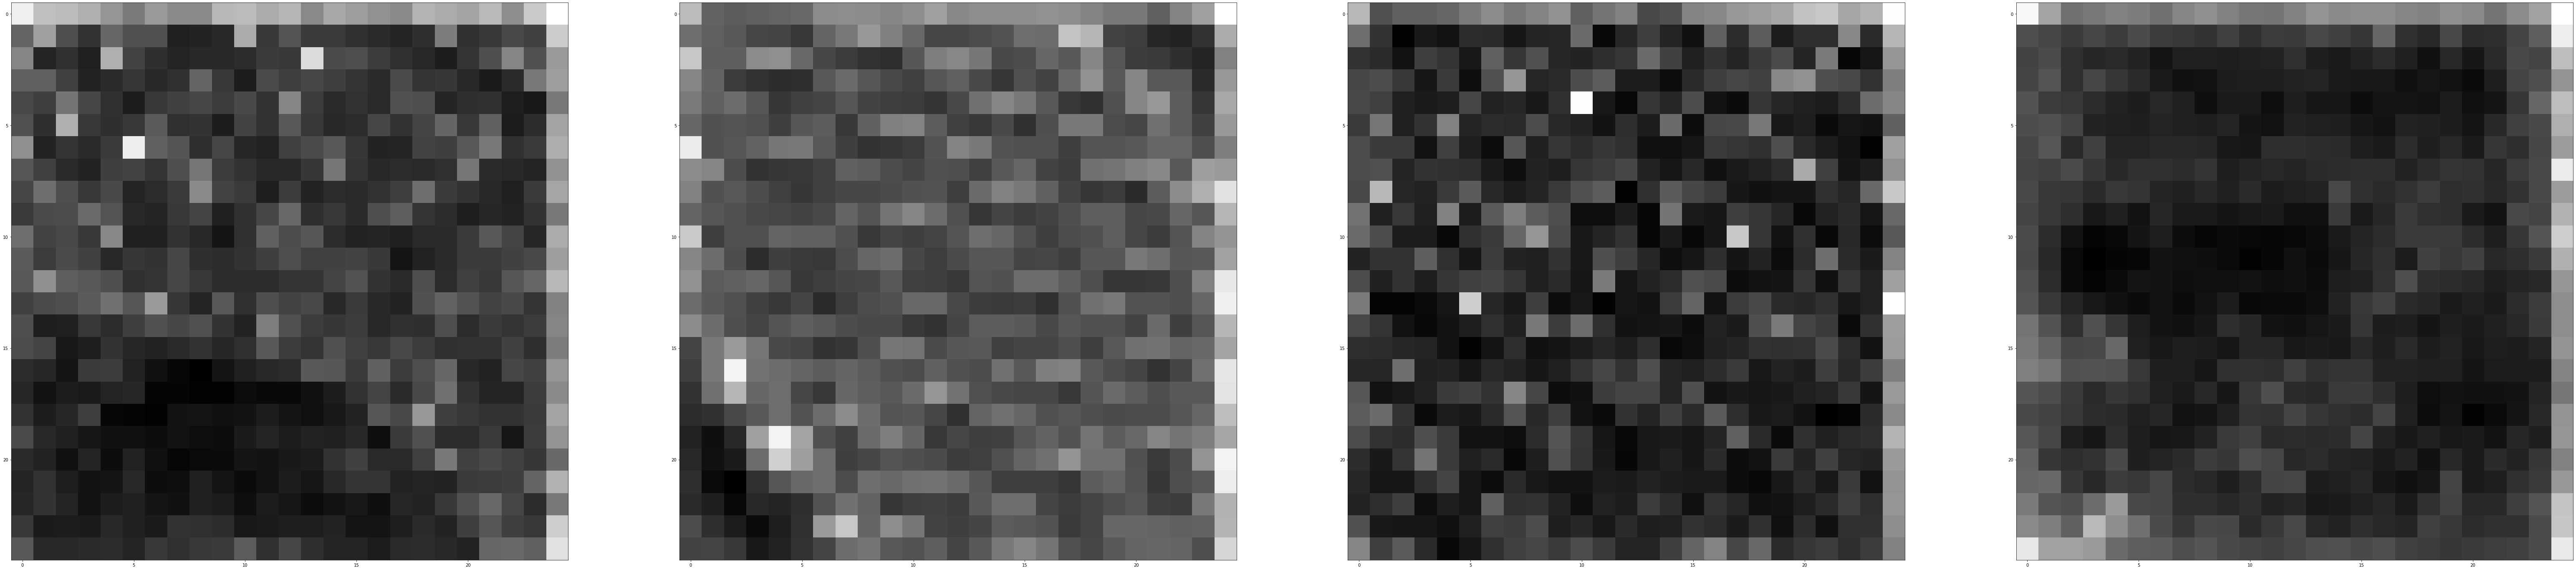

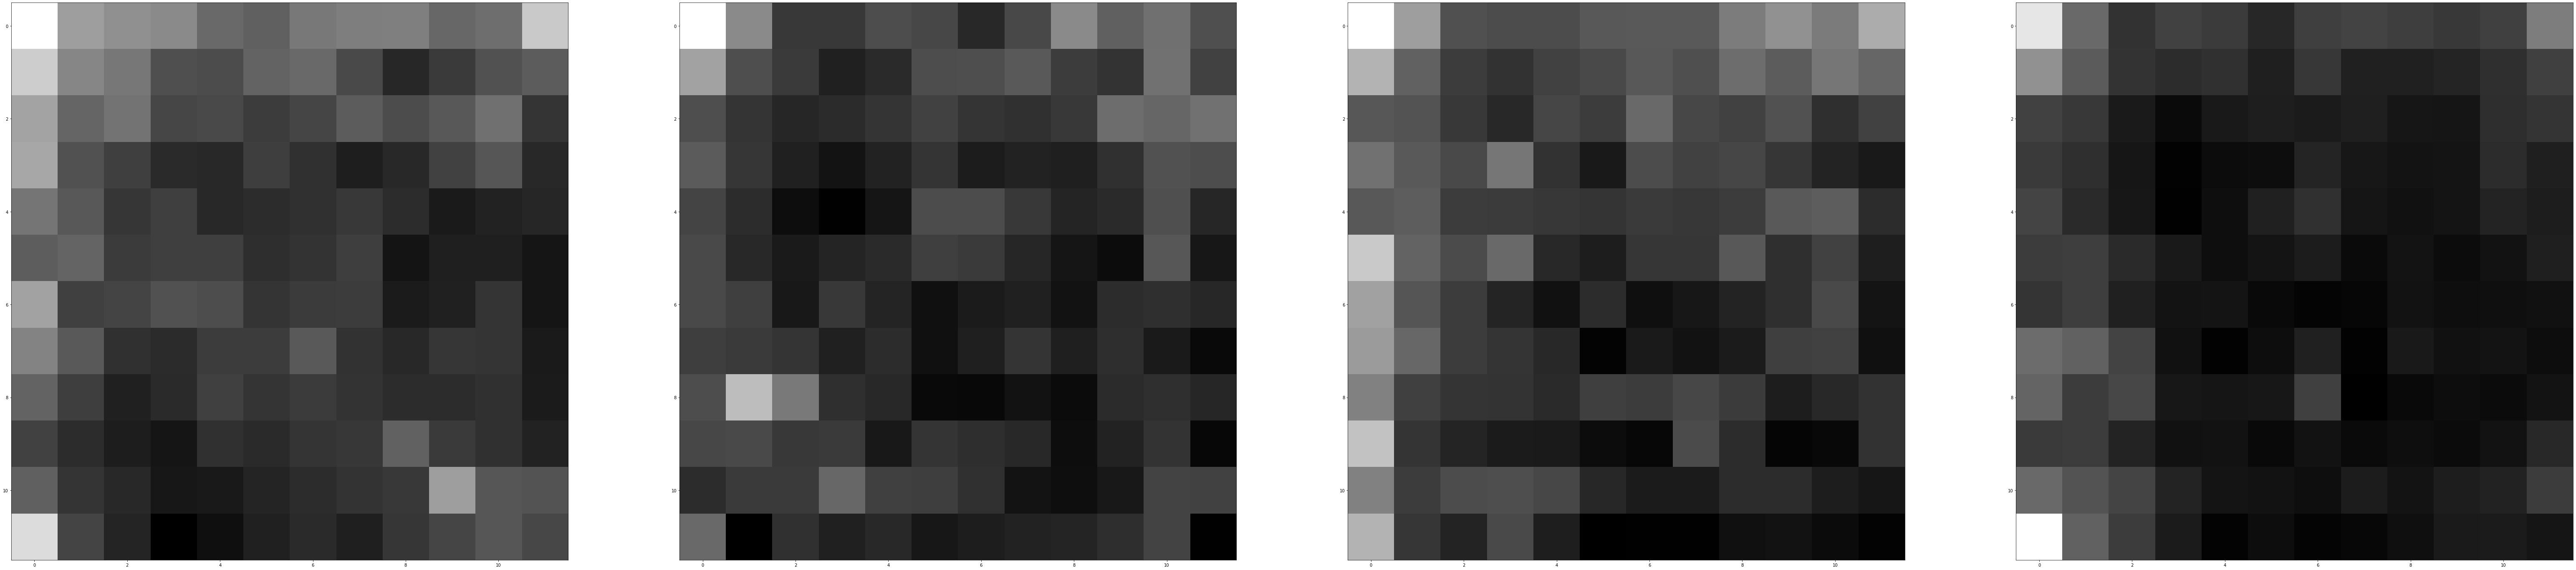

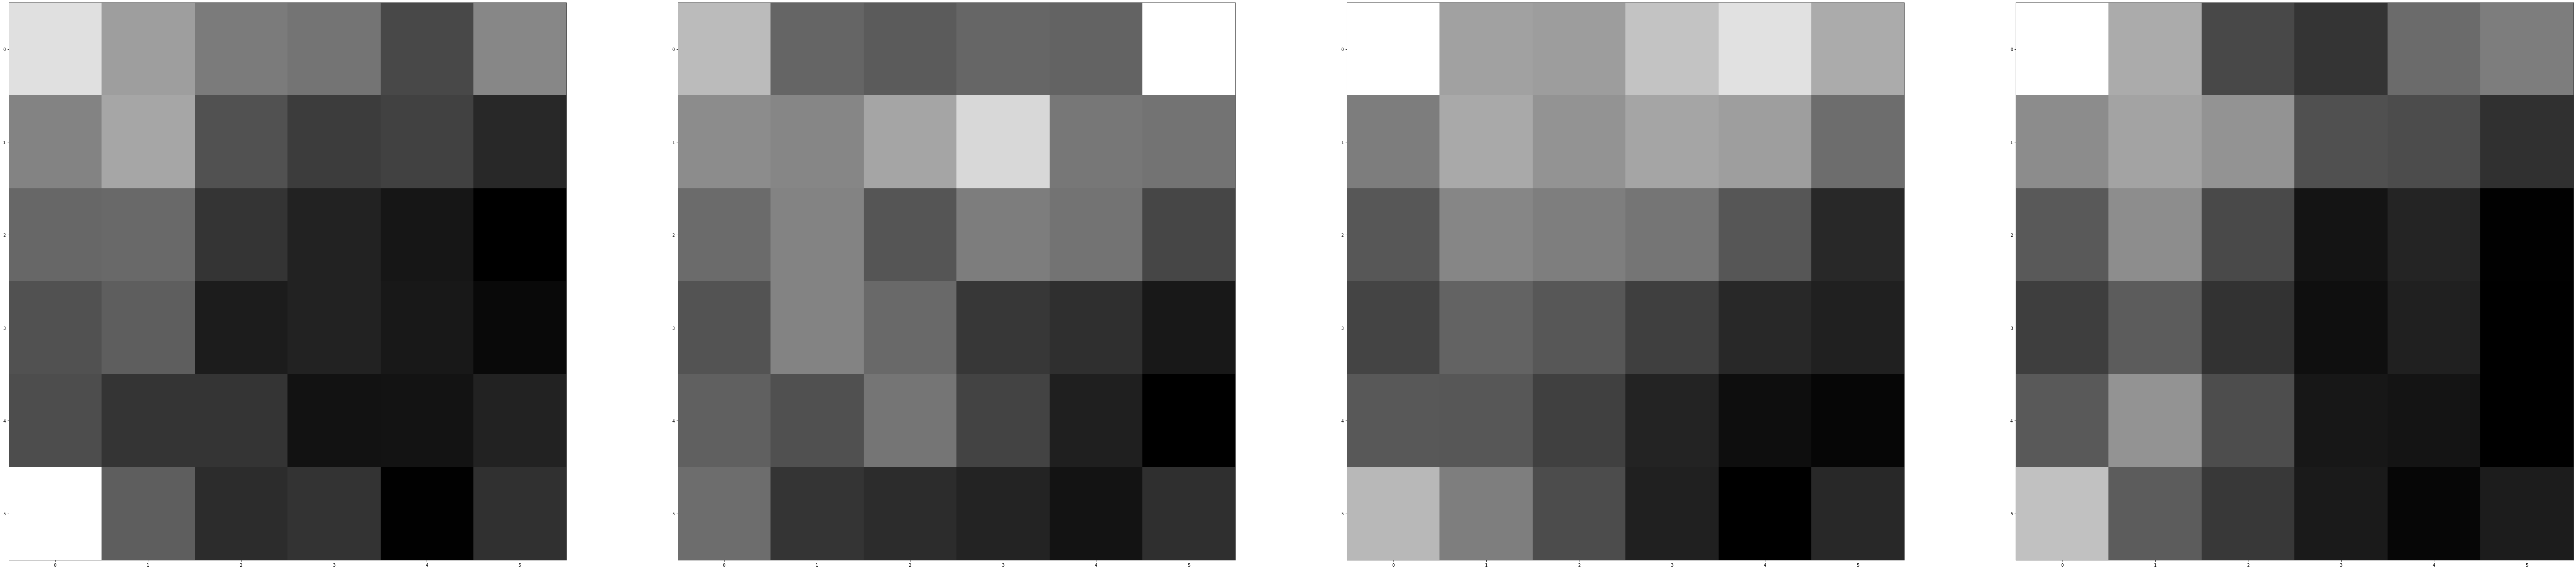

In [8]:
for name in layers.values():
    result = []
    for texture in textures:
        conv1 = texture.get(name)
        result.append(transformation_max(conv1))
        
    show(result)

# Get first two conv layers

In [9]:
result = []
for texture in textures:
    
    new_blocks = {}
    for idx, block in texture.items():
        if idx not in ['conv1_1', 'conv2_1']:
            break
            
        scale_factor = SIZE / block.size()[-1]
        m = nn.Upsample(scale_factor=scale_factor, mode='nearest')    
        block_new = m(block)
        new_blocks[idx] = block_new

    all_blacks = torch.cat(tuple(new_blocks.values()), 1)
    result.append(transformation_max(all_blacks))

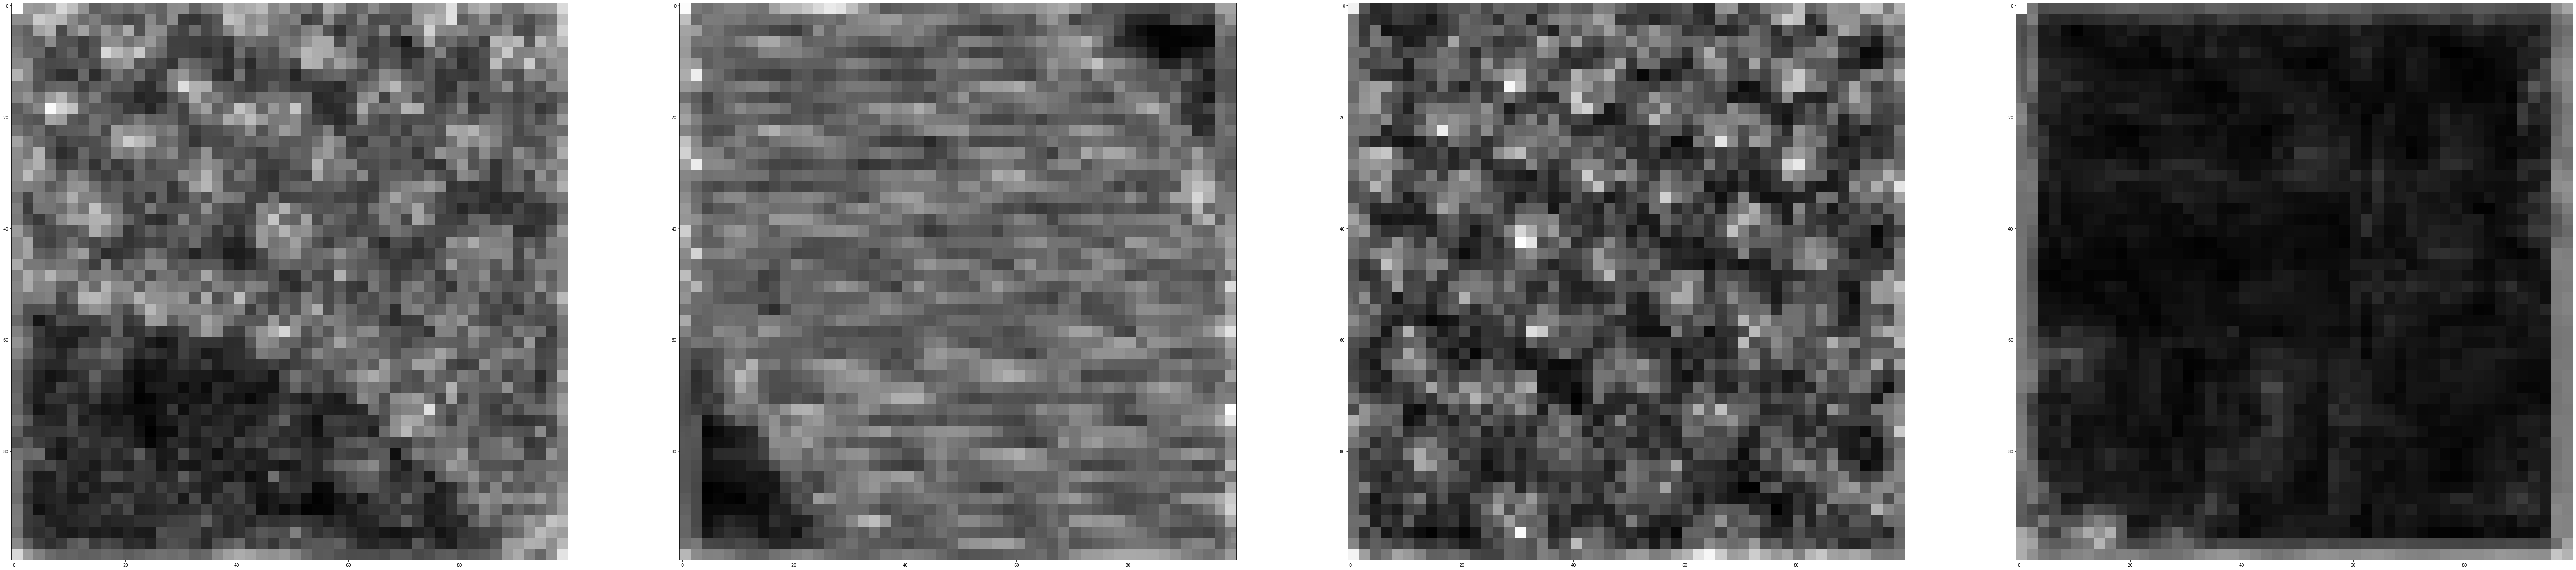

In [10]:
show(result)